
# Comparative Analysis of Machine Learning Models on the Iris Dataset..


# 1. Data Preprocessing

In [40]:
# import the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score,adjusted_rand_score,jaccard_score,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
iris = datasets.load_iris()


####  Load the Iris dataset.


In [2]:
df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0:'setosa', 1:'versicolor', 2:'virginica'})
df.to_csv('iris.csv')

#### Perform data exploration and visualization.


In [3]:
iris = pd.read_csv("iris.csv")
iris

,Unnamed: 0,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,virginica
146,146,6.3,2.5,5.0,1.9,virginica
147,147,6.5,3.0,5.2,2.0,virginica
148,148,6.2,3.4,5.4,2.3,virginica


#### Check for missing values and handle them if any

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         150 non-null    int64  
 1   sepal length (cm)  150 non-null    float64
 2   sepal width (cm)   150 non-null    float64
 3   petal length (cm)  150 non-null    float64
 4   petal width (cm)   150 non-null    float64
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


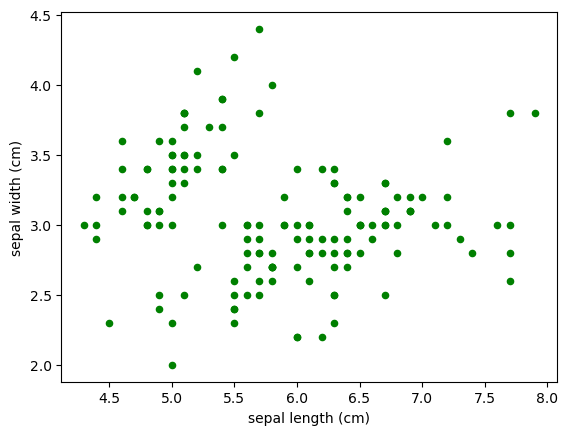

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
iris.plot(kind="scatter", x="sepal length (cm)", y="sepal width (cm)",color="green")
plt.show()

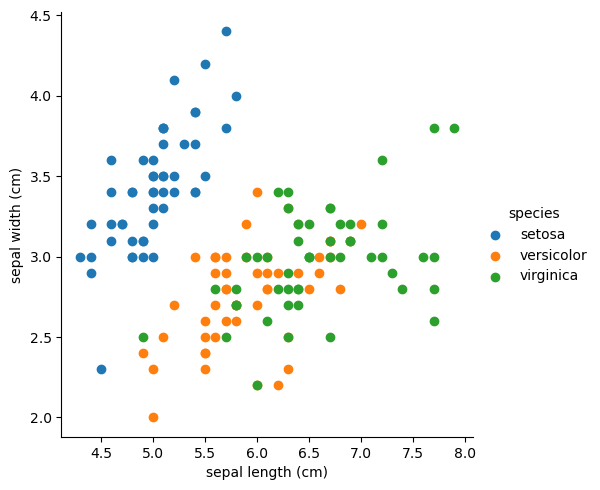

In [6]:
sns.FacetGrid(iris, hue="species", height= 5) \
   .map(plt.scatter, "sepal length (cm)", "sepal width (cm)") \
   .add_legend()
plt.show()

#### Split the dataset into features and target variables.

In [7]:
iris = datasets.load_iris()
X = pd.DataFrame(data=iris.data,columns=iris.feature_names)
y = pd.Series(iris.target,name='species').map({0:'setosa', 1:'versicolor', 2:'virginica'})

# 2. Unsupervised Learning: Clustering and Outlier Detection

#### Apply K-means clustering algorithm to cluster the data.

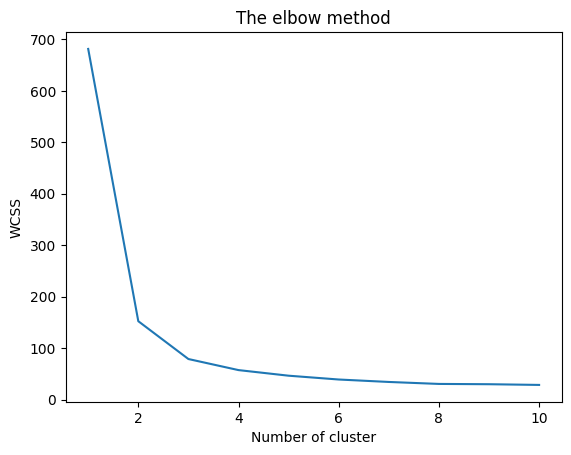

In [8]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++',random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

In [8]:
km = KMeans(n_clusters = 3)
km.fit(X)
y_km=km.fit_predict(X)

c:\Users\fahad\miniconda3\envs\t6\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\fahad\miniconda3\envs\t6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\fahad\miniconda3\envs\t6\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\fahad\miniconda3\envs\t6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

In [9]:
df['cluster'] = km.labels_

In [10]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,1
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


####  Visualize the clusters.


c:\Users\fahad\miniconda3\envs\t6\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fahad\miniconda3\envs\t6\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\fahad\miniconda3\envs\t6\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fahad\miniconda3\envs\t6\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-

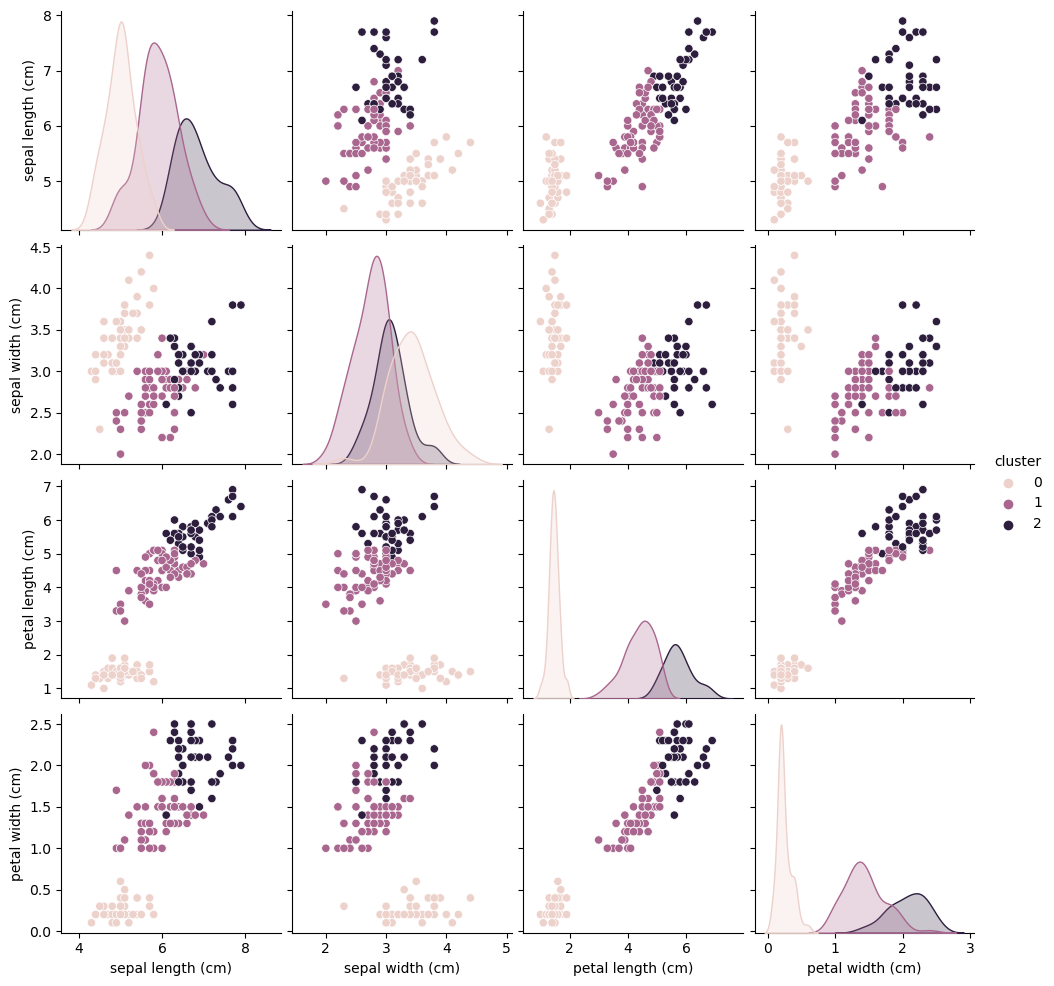

In [11]:
sns.pairplot(df, hue="cluster")
plt.show()

#### Detect outliers using appropriate techniques such as isolation forest or DBSCAN

In [24]:
cluster_centers = km.cluster_centers_
X_with_centers = pd.concat([X, pd.DataFrame(cluster_centers, columns=iris.feature_names)], axis=0)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_with_centers)
outlier_labels = dbscan.labels_
outlier_labels
# -1 IS the outlier 

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1],
      dtype=int64)

In [25]:
outlier_indices = X_with_centers.index[outlier_labels == -1]
outliers_df = X_with_centers.loc[outlier_indices]
print("Outliers:")
print(outliers_df)

Outliers:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
41                 4.5               2.3                1.3               0.3
57                 4.9               2.4                3.3               1.0
60                 5.0               2.0                3.5               1.0
68                 6.2               2.2                4.5               1.5
87                 6.3               2.3                4.4               1.3
93                 5.0               2.3                3.3               1.0
98                 5.1               2.5                3.0               1.1
105                7.6               3.0                6.6               2.1
106                4.9               2.5                4.5               1.7
108                6.7               2.5                5.8               1.8
109                7.2               3.6                6.1               2.5
117                7.7               3.8              

#### Evaluate the clustering results

In [26]:
from sklearn.metrics import silhouette_score
silhouette_kmeans = silhouette_score(X, km.labels_)
print("the score is", silhouette_kmeans)

the score is 0.5528190123564095


# 3. Supervised Learning: Baseline Model (10 marks)

####  Choose an appropriate evaluation metric based on the problem (classification)

In [27]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X, y)

sample = X.iloc[[0]]
predicted_label = sgd_clf.predict(sample)

y_pred = cross_val_predict(sgd_clf, X, y, cv=3)

precision = precision_score(y, y_pred, average='weighted')
print("Precision Score is ", precision)

recall = recall_score(y, y_pred, average='weighted')
print("Recall Score:", recall)

f1 = f1_score(y, y_pred, average='weighted')
print("F1 Score:", f1)

Precision Score is  0.8380388585306618
Recall Score: 0.78
F1 Score: 0.7426785728718687


#### Split the dataset into training and testing sets.

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


#### Build a baseline model (e.g., logistic regression or decision tree) using default parameters

In [29]:
from sklearn.tree import DecisionTreeClassifier
tree_slf = DecisionTreeClassifier()
tree_slf.fit(X_train,y_train)
y_pred = tree_slf.predict(X_test)


#### Evaluate the baseline model's performance.


In [30]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred,average='weighted')
print("Precision Score is ", precision)

Accuracy: 0.9666666666666667
Precision Score is  0.9700000000000001


# 4. Model Comparison (30 marks):

#### Select 3-4 machine learning algorithms (e.g., SVM, Random Forest, Gradient Boosting) suitable for the problem.

In [32]:
# SVM
svm_model = SVC()
svm_scores = cross_val_score(svm_model, X, y, cv=5)  # 5-fold cross-validation
svm_accuracy = np.mean(svm_scores)

# Random Forest
rf_model = RandomForestClassifier()
rf_scores = cross_val_score(rf_model, X, y, cv=5)
rf_accuracy = np.mean(rf_scores)

# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_scores = cross_val_score(gb_model, X, y, cv=5)
gb_accuracy = np.mean(gb_scores)

# Compare the performance
results = pd.DataFrame({
    'Model': ['SVM', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [svm_accuracy, rf_accuracy, gb_accuracy]
})

print(results)


               Model  Accuracy
0                SVM  0.966667
1      Random Forest  0.960000
2  Gradient Boosting  0.960000


#### Implement each algorithm and evaluate its performance using cross-validation.


In [34]:
# Support Vector Machines (SVM)
svm_model = SVC()
svm_scores = cross_val_score(svm_model, X, y, cv=5)  # 5-fold cross-validation
svm_accuracy = np.mean(svm_scores)
svm_precision = np.mean(cross_val_score(svm_model, X, y, cv=5, scoring='precision_macro'))
svm_recall = np.mean(cross_val_score(svm_model, X, y, cv=5, scoring='recall_macro'))
svm_f1 = np.mean(cross_val_score(svm_model, X, y, cv=5, scoring='f1_macro'))

# Random Forest
rf_model = RandomForestClassifier()
rf_scores = cross_val_score(rf_model, X, y, cv=5)
rf_accuracy = np.mean(rf_scores)
rf_precision = np.mean(cross_val_score(rf_model, X, y, cv=5, scoring='precision_macro'))
rf_recall = np.mean(cross_val_score(rf_model, X, y, cv=5, scoring='recall_macro'))
rf_f1 = np.mean(cross_val_score(rf_model, X, y, cv=5, scoring='f1_macro'))

# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_scores = cross_val_score(gb_model, X, y, cv=5)
gb_accuracy = np.mean(gb_scores)
gb_precision = np.mean(cross_val_score(gb_model, X, y, cv=5, scoring='precision_macro'))
gb_recall = np.mean(cross_val_score(gb_model, X, y, cv=5, scoring='recall_macro'))
gb_f1 = np.mean(cross_val_score(gb_model, X, y, cv=5, scoring='f1_macro'))

# Create a DataFrame to compare the performance metrics
results = pd.DataFrame({
    'Algorithm': ['SVM', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [svm_accuracy, rf_accuracy, gb_accuracy],
    'Precision': [svm_precision, rf_precision, gb_precision],
    'Recall': [svm_recall, rf_recall, gb_recall],
    'F1-score': [svm_f1, rf_f1, gb_f1]
})

print(results)

           Algorithm  Accuracy  Precision    Recall  F1-score
0                SVM  0.966667   0.968485  0.966667  0.966617
1      Random Forest  0.960000   0.963434  0.966667  0.966482
2  Gradient Boosting  0.960000   0.962290  0.960000  0.959900


#### Compare the performance of algorithms based on evaluation metrics.

In [35]:
# Compare the performance
results = pd.DataFrame({
    'Algorithm': ['SVM', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [svm_accuracy, rf_accuracy, gb_accuracy]
})

# Select the best-performing algorithm based on accuracy
best_algorithm = results.loc[results['Accuracy'].idxmax(), 'Algorithm']

print(results)
print("Best Performing Algorithm: ", best_algorithm)

           Algorithm  Accuracy
0                SVM  0.966667
1      Random Forest  0.960000
2  Gradient Boosting  0.960000
Best Performing Algorithm:  SVM


#### Select the best-performing algorithm

Best Performing Algorithm:SVM 

# 5. Model Tuning and Ensemble

#### Perform hyperparameter tuning on the best-performing algorithm using Grid Search or Random Search.

In [38]:
# Support Vector Machines (SVM)
svm_model = SVC()
# Define the hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

# Print the best hyperparameters and best score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Hyperparameters:  {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score:  0.9800000000000001


#### Evaluate the tuned model's performance

In [39]:
# Evaluate the performance of the tuned model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the performance metrics
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))

Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1-score: 0.97


#### Implement an ensemble of the top-performing algorithms and compare its performance with the tuned model.

In [41]:

# Define the individual models to include in the ensemble
model1 = SVC(C=5, gamma='scale', kernel='poly', random_state=42, probability=True)
model2 = RandomForestClassifier(random_state=42)
model3 = GradientBoostingClassifier(random_state=42)

# Create the ensemble model (Voting Classifier)
ensemble = VotingClassifier(estimators=[
    ('svm', model1), ('rf', model2), ('gb', model3)
], voting='soft')

# Train the ensemble model
ensemble.fit(X_train, y_train)

# Predict on the testing set
y_pred_ensemble = ensemble.predict(X_test)

# Evaluate the ensemble model
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
class_report_ensemble = classification_report(y_test, y_pred_ensemble, target_names=iris.target_names)
conf_matrix_ensemble = confusion_matrix(y_test, y_pred_ensemble)
print(accuracy_ensemble)
print(class_report_ensemble)
print(conf_matrix_ensemble)


1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[ 8  0  0]
 [ 0 13  0]
 [ 0  0  9]]
